In [1]:
## PS :- To build a predictive model which car identifies if email is ham or spam

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
pd.read_csv(r"C:\Users\hp\Downloads\spam1.csv")
sp=pd.read_csv(r"C:\Users\hp\Downloads\spam1.csv")


In [3]:
#sp.head()

In [4]:
#sp.isnull().sum()

In [5]:
sp.shape

(6776, 5)

In [6]:
sp = sp.iloc[ : , [0,1]]
sp.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
sp.rename(columns={'v1':'label' , 'v2':'message'} , inplace= True)

In [8]:
sp.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
sp.label.value_counts()

ham     5854
spam     922
Name: label, dtype: int64

In [10]:
sp.label.replace({'ham':0 ,'spam':1} , inplace= True)

In [11]:
sp.label.value_counts()

0    5854
1     922
Name: label, dtype: int64

In [12]:
sp.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
## Lets convert low data in lower case

In [14]:
sp.message = sp.message.str.lower()

In [15]:
sp.head()

,label,message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [16]:
## Remove Stop Word and Punctuations

In [17]:
import nltk

In [24]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
len(stopwords.words('english'))                  ## finding how many stop words in english language

179

In [28]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [21]:
!pip install wordcloud

In [22]:
nltk.download('WordCloud')

[nltk_data] Error loading WordCloud: Package 'WordCloud' not found in
[nltk_data]     index


False

In [23]:
from wordcloud import WordCloud

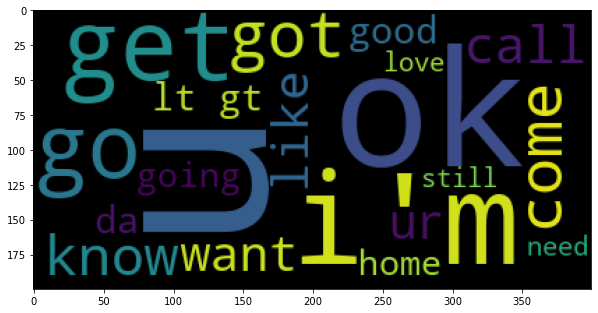

In [29]:
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=20).generate(str(sp.message))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [ ]:
## Build a separate word cloud on spam and separate 

In [32]:
ham_df = sp[sp.label == 0]
spam_df = sp[sp.label == 1]

In [35]:
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=20).generate(str(sp.ham_df))
plt.figure(figsize=(10,10))
plt.imshow(cloud)ham_df

AttributeError: 'DataFrame' object has no attribute 'ham_df'

In [32]:
import string

In [33]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
def text_process(mess): ### creating a function
    """ ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords

    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)

    return [ word for word in nopunc.split() if word not in stopwords.words("english")]

In [38]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
examples = 'this is just a example to show + / if stopwordsor punctuations are removed '

In [42]:
text_process(examples)

['example', 'show', 'stopwordsor', 'punctuations', 'removed']

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
##Count vestie8zer is used to get the count of each and every word

In [44]:
bow_transformer = CountVectorizer(analyzer = text_process ).fit(sp["message"])

In [45]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [46]:
len(bow_transformer.vocabulary_)             ## total number of unique words

## to our TDM will have same number if column

9419

In [47]:
sp_bow = bow_transformer.transform(sp.message)        ### Creating TDM

## This TDM will act as X variables

In [48]:
sp_bow.shape

(6776, 9419)

In [49]:
type(sp_bow)

scipy.sparse.csr.csr_matrix

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train ,x_test,y_train , y_test = train_test_split(sp_bow , sp.label , test_size= .2)

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
nb = MultinomialNB()

In [54]:
nb.fit(x_train , y_train)

MultinomialNB()

In [55]:
pred = nb.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix
tab_nb = confusion_matrix(pred ,y_test)
tab_nb

array([[1128,   11],
       [  22,  195]], dtype=int64)

In [58]:
tab_nb.diagonal().sum() / tab_nb.sum() * 100                ## Accuracy

97.56637168141593

## Decesion tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier(criterion='entropy', min_samples_split=  150 , max_depth= 3 , splitter='best')

In [60]:
dc.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=150)

In [61]:
pred_dc = dc.predict(x_test)


In [62]:
tab_dc=confusion_matrix(pred_dc,y_test)
tab_dc

array([[1088,   61],
       [  62,  145]], dtype=int64)

In [63]:
acc=tab_dc.diagonal().sum()*100/tab_dc.sum()
acc

90.929203539823

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=101 , criterion='entropy' , class_weight='balanced')

In [69]:
rfc.fit(x_train , y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=101)

In [70]:
pred_rfc = rfc.predict(x_test)

In [71]:
tab = confusion_matrix(pred_rfc , y_test)
tab

array([[1150,   34],
       [   0,  172]], dtype=int64)

In [74]:
acc=tab.diagonal().sum()*100/tab.sum()
acc

97.49262536873157

## Word Cloud